# Importance Weights analysis

### Import Data

In [41]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [42]:
sim_path = '../../results/synth_classification_fixed_dataset_and_samples/03-05-2023-16:21'

In [43]:
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

runs_dirs = get_immediate_subdirectories(sim_path)

In [44]:
true_weights_list = []
pre_AL_weights_list = []
concept_list = []

uncertainty_spreading_weights = {}
first_K_sampling_weights = {}
random_sampling_weights = {}

STRATEGIES = [
    "RandomSampling",
]

for run in runs_dirs:
    with open(sim_path + '/'+ run +'/true_weights.json', 'r') as f:
        true_weights_list.append(json.load(f))

    with open(sim_path + '/'+ run +'/pre_AL_weights.json', 'r') as f:
        pre_AL_weights_list.append(json.load(f))

    with open(sim_path + '/'+ run +'/metadata.json', 'r') as f:
        metadata = json.load(f)

    for n in range(metadata['n_concepts']):

        concept_list.append(pd.read_csv(
            sim_path + '/'+ run + '/concept_' + str(n) + '.csv',
        ))

    for strategy in STRATEGIES:

        strategy_path = sim_path + '/' + run + '/' + strategy

        for n in range(metadata['n_samples']):

            n_sample = n + 1

            with open(strategy_path + '/' + str(n_sample) + '_samples.json', 'r') as f:

                if strategy == "RandomSampling":
                    random_sampling_weights[n_sample] = json.load(f)

                elif strategy == "UncertaintySpreading":
                    uncertainty_spreading_weights[n_sample] = json.load(f)

                elif strategy == "FirstKSampling":
                    first_K_sampling_weights[n_sample] = json.load(f)

### Plot Concepts


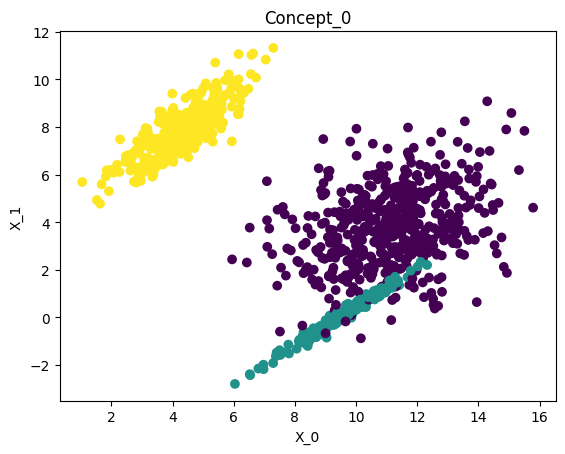

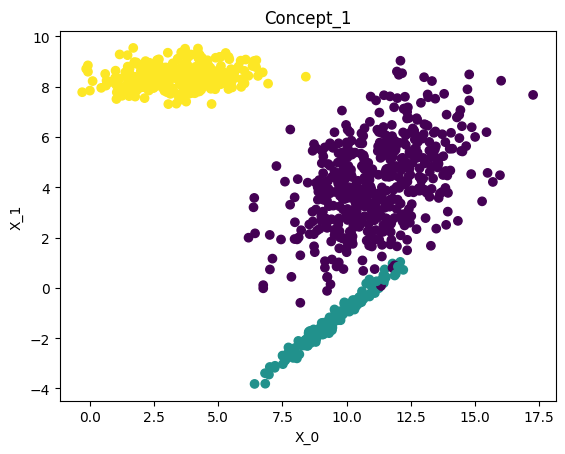

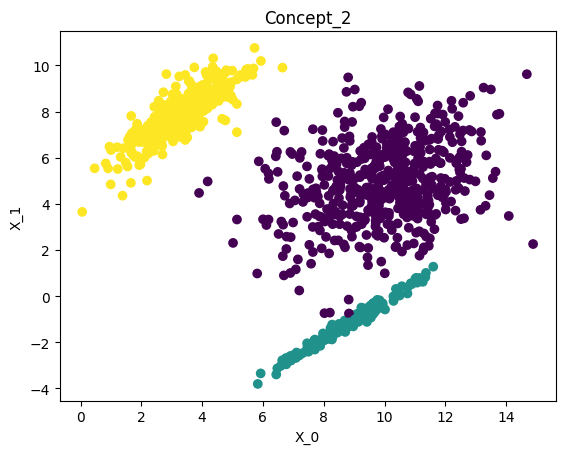

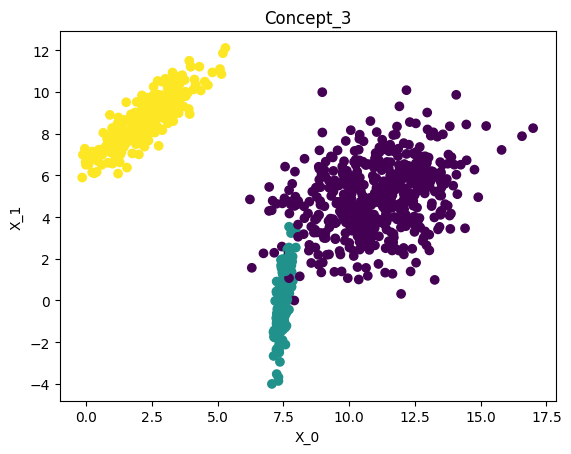

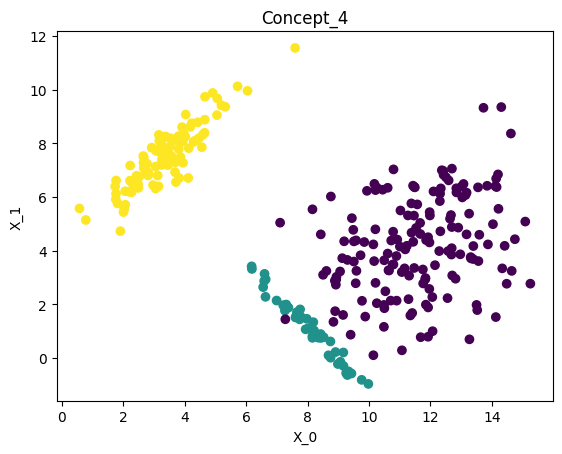

In [45]:
for index,concept in enumerate(concept_list):
    plt.scatter(concept['X_0'], concept['X_1'], c=concept['y_0'])
    plt.xlabel('X_0')
    plt.ylabel('X_1')
    plt.title('Concept_' + str(index))
    plt.show()


### Compute MAE

In [46]:
mae_pre = mean_absolute_error(true_weights_list[0], pre_AL_weights_list[0])

In [47]:
mae_us = {}
for key in uncertainty_spreading_weights.keys():
    mae_us[key] = mean_absolute_error(true_weights_list[0], uncertainty_spreading_weights[key])


In [48]:
mae_rs = {}
for key in random_sampling_weights.keys():
    mae_rs[key] = mean_absolute_error(true_weights_list[0], random_sampling_weights[key])

### Plot Results

In [49]:
mae_rs

{1: 1.2428352679688002,
 2: 1.2422992313040468,
 3: 1.242239904526162,
 4: 1.2414439773249697,
 5: 1.2410541612940869,
 6: 1.2423031041462163,
 7: 1.2423882199362628,
 8: 1.242056127374899,
 9: 1.242029198823125,
 10: 1.2431684900976883,
 11: 1.2423306829679432,
 12: 1.2423281917076128,
 13: 1.2413174020324773,
 14: 1.2416201895982333,
 15: 1.2419452501454407,
 16: 1.2401767766544154,
 17: 1.240606206036788,
 18: 1.2407403189528454,
 19: 1.2420615658455203,
 20: 1.2416564010992404,
 21: 1.2420724038459012,
 22: 1.2416531703882923,
 23: 1.24297242800307,
 24: 1.2435022343775946,
 25: 1.2430204918587315,
 26: 1.242126133259878,
 27: 1.2426430453828046,
 28: 1.242126583526975,
 29: 1.243787980193249,
 30: 1.2437764139401084,
 31: 1.243392428568215,
 32: 1.2429496260973052,
 33: 1.2428757109898423,
 34: 1.242517195994331,
 35: 1.242907807208132,
 36: 1.2425328351966616,
 37: 1.242181067205242,
 38: 1.243507284167607,
 39: 1.2436273627348537,
 40: 1.2438918727901054,
 41: 1.243439991953991,

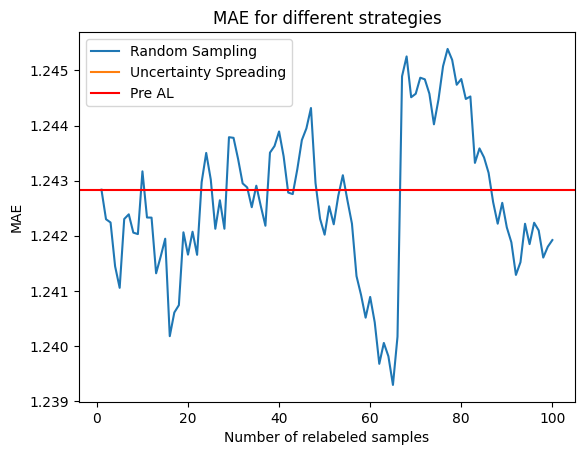

In [50]:
# create a new figure and axis object
fig, ax = plt.subplots()

# plot the MAE values for each model as a line
ax.plot(list(mae_rs.keys()), list(mae_rs.values()), label='Random Sampling')
ax.plot(list(mae_us.keys()),list(mae_us.values()), label='Uncertainty Spreading')
plt.axhline(y=mae_pre, color='r', linestyle='-', label='Pre AL')

# add a legend to the plot
ax.legend()

# set the x-axis label
ax.set_xlabel('Number of relabeled samples')

# set the y-axis label
ax.set_ylabel('MAE')

# set the title of the plot
ax.set_title('MAE for different strategies')

# display the plot
plt.show()
